In [9]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Palestine-Israel_tweets_cleaned.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [17]:
df

,profile_id,comments,likes,quotes,retweets,year,month,day,israel,gaza,...,hear,source,weapon,statement,camp,sexual,near,fight,sentiment_polarity,sentiment
0,1712776952593924096,3,5,0,1,2023,10,16,2,1,...,0,0,0,0,0,0,0,0,0.000000,0
1,1712776952593924096,0,0,0,0,2023,10,16,2,1,...,0,0,0,0,0,0,0,0,0.400000,1
2,1712776952593924096,1,1,0,0,2023,10,16,0,1,...,0,0,0,0,0,0,0,0,-0.400000,-1
3,1712776952593924096,0,2,0,0,2023,10,16,2,2,...,0,0,0,0,0,0,0,0,0.500000,1
4,1712776952593924096,0,0,0,1,2023,10,16,1,4,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1752382749153927168,608,11402,133,3209,2023,10,7,4,0,...,0,0,0,1,0,0,0,0,0.114286,1
4771,1714526492258975744,2,14,0,3,2023,10,7,0,0,...,0,0,0,0,0,0,0,0,0.000000,0
4772,1714526492258975744,3,19,0,5,2023,10,7,1,1,...,0,1,0,0,0,0,0,0,0.000000,0
4773,1714526492258975744,0,5,0,0,2023,10,7,0,0,...,0,0,0,0,0,0,0,0,0.175000,1


In [20]:
df2 = df[['day','sentiment']]
df2

,day,sentiment
0,16,0
1,16,1
2,16,-1
3,16,1
4,16,0
...,...,...
4770,7,1
4771,7,0
4772,7,0
4773,7,1


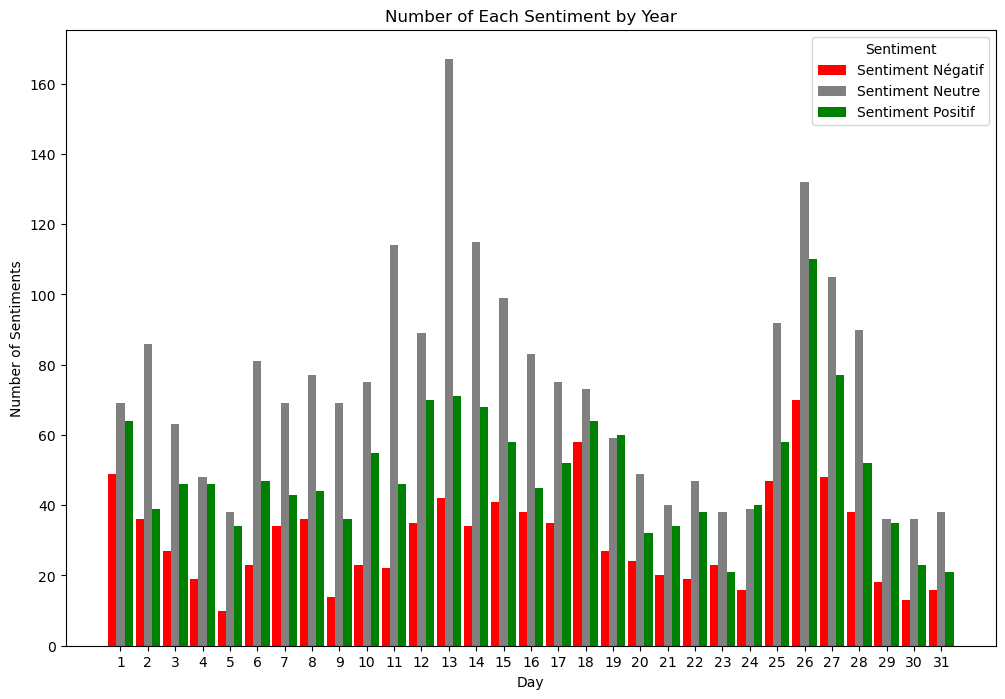

In [53]:
# Compter le nombre de chaque sentiment pour chaque année
sentiment_counts = df2.groupby(['day', 'sentiment']).size().unstack(fill_value=0)

# Assurez-vous que toutes les valeurs de sentiment sont présentes dans le DataFrame
sentiment_counts = sentiment_counts.reindex(columns=[-1, 0, 1], fill_value=0)

# Définir les positions des barres
day = sentiment_counts.index
n_day = len(day)
n_bars = len(sentiment_counts.columns)
bar_width = 0.3
x = np.arange(n_day)

# Tracer l'histogramme avec des barres groupées
fig, ax = plt.subplots(figsize=(12, 8))  # Agrandir la taille du plot à 12x8 pouces
for i, sentiment in enumerate(sentiment_counts.columns):
    if sentiment < 0 :
        ax.bar(x + i * bar_width, sentiment_counts[sentiment], width=bar_width, color='red' ,label='Sentiment Négatif')
    elif sentiment == 0 :
        ax.bar(x + i * bar_width, sentiment_counts[sentiment], width=bar_width, color='gray' ,label='Sentiment Neutre')
    else :
        ax.bar(x + i * bar_width, sentiment_counts[sentiment], width=bar_width, color='green' ,label='Sentiment Positif')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Day')
ax.set_ylabel('Number of Sentiments')
ax.set_title('Number of Each Sentiment by Year')
ax.set_xticks(x + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(day)
ax.legend(title='Sentiment')

# Afficher le graphique
plt.show()


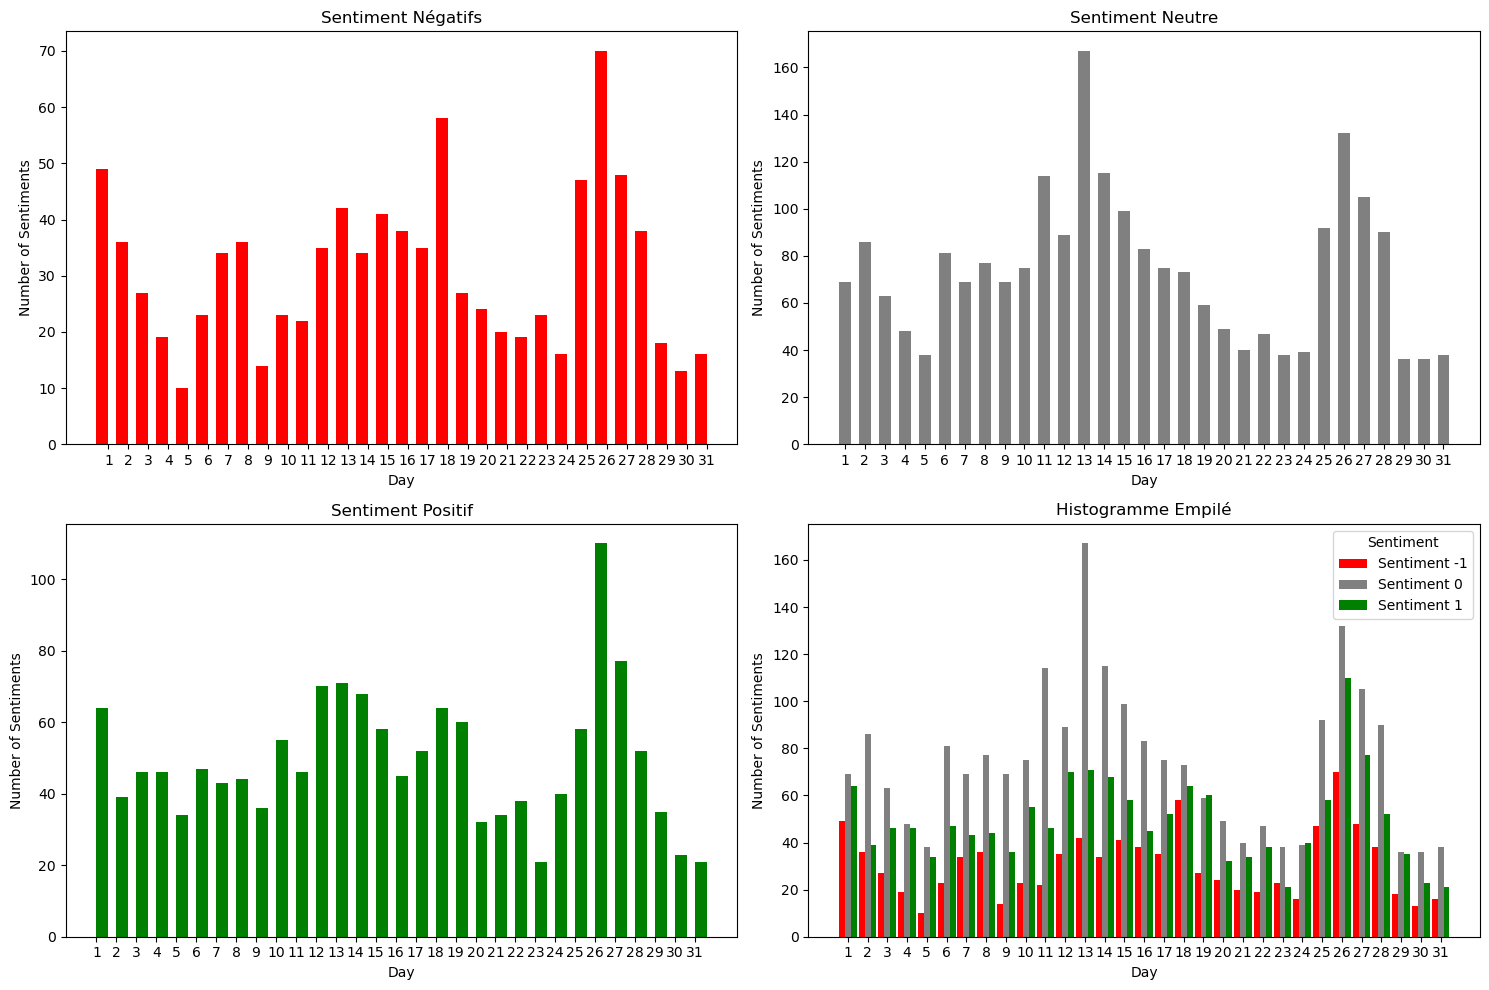

In [61]:
# Compter le nombre de chaque sentiment pour chaque année
sentiment_counts = df2.groupby(['day', 'sentiment']).size().unstack(fill_value=0)

# Assurez-vous que toutes les valeurs de sentiment sont présentes dans le DataFrame
sentiment_counts = sentiment_counts.reindex(columns=[-1, 0, 1], fill_value=0)

# Définir les positions des barres
days = sentiment_counts.index
n_days = len(days)
n_bars = len(sentiment_counts.columns)
bar_width = 0.3
x = np.arange(n_days)

# Définir des couleurs pour chaque sentiment
colors = { -1: 'red', 0: 'gray', 1: 'green' }

# Créer une figure avec plusieurs sous-graphiques
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Créer une grille 2x2 de sous-graphiques

# Premier plot
axs[0, 0].bar(x - bar_width, sentiment_counts[-1], width=bar_width*2, color=colors[-1], label='Sentiment -1')
axs[0, 0].set_title('Sentiment Négatifs')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(days)
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Number of Sentiments')

# Deuxième plot
axs[0, 1].bar(x, sentiment_counts[0], width=bar_width*2, color=colors[0], label='Sentiment 0')
axs[0, 1].set_title('Sentiment Neutre')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(days)
axs[0,1].set_xlabel('Day')
axs[0,1].set_ylabel('Number of Sentiments')

# Troisième plot
axs[1, 0].bar(x + bar_width, sentiment_counts[1], width=bar_width*2, color=colors[1], label='Sentiment 1')
axs[1, 0].set_title('Sentiment Positif')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(days)
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Number of Sentiments')

# Quatrième plot: Histogramme empilé
for i, sentiment in enumerate(sentiment_counts.columns):
    axs[1, 1].bar(x + i * bar_width, sentiment_counts[sentiment], width=bar_width, color=colors[sentiment], label=f'Sentiment {sentiment}')
axs[1, 1].set_title('Histogramme Empilé')
axs[1, 1].set_xticks(x + bar_width)
axs[1, 1].set_xticklabels(days)
axs[1, 1].legend(title='Sentiment')
axs[1,1].set_xlabel('Day')
axs[1,1].set_ylabel('Number of Sentiments')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()
